In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Execution = pd.read_csv("execution_clean.csv")
Execution

,country,region,population,latest execution,year,executed
0,Afghanistan,Asia,28396000,2022,2007,15.0
1,Afghanistan,Asia,28396000,2022,2008,17.0
2,Afghanistan,Asia,28396000,2022,2009,0.0
3,Afghanistan,Asia,28396000,2022,2010,0.0
4,Afghanistan,Asia,28396000,2022,2011,2.0
...,...,...,...,...,...,...
1275,Zimbabwe,Africa,16500000,2005,2018,0.0
1276,Zimbabwe,Africa,16500000,2005,2019,0.0
1277,Zimbabwe,Africa,16500000,2005,2020,0.0
1278,Zimbabwe,Africa,16500000,2005,2021,0.0


In [3]:
Fragile = pd.read_csv("fragile.csv")
Fragile

,country,year,fragile index
0,Afghanistan,2007,102.3
1,Afghanistan,2008,105.4
2,Afghanistan,2009,108.2
3,Afghanistan,2010,109.3
4,Afghanistan,2011,107.5
...,...,...,...
2667,Zimbabwe,2018,102.3
2668,Zimbabwe,2019,99.5
2669,Zimbabwe,2020,99.2
2670,Zimbabwe,2021,99.1


In [4]:
Democracy = pd.read_csv("democracy_clean.csv")
Democracy

,country,code,year,electoral democracy,elect high,elect low
0,Afghanistan,AFG,2007,0.397,0.438,0.350
1,Afghanistan,AFG,2008,0.403,0.437,0.349
2,Afghanistan,AFG,2009,0.392,0.430,0.347
3,Afghanistan,AFG,2010,0.374,0.408,0.328
4,Afghanistan,AFG,2011,0.378,0.418,0.334
...,...,...,...,...,...,...
2971,Zimbabwe,ZWE,2018,0.305,0.333,0.271
2972,Zimbabwe,ZWE,2019,0.293,0.319,0.262
2973,Zimbabwe,ZWE,2020,0.293,0.325,0.263
2974,Zimbabwe,ZWE,2021,0.291,0.320,0.261


In [5]:
Literacy = pd.read_csv("literacy_clean.csv")
Literacy

,country,year,literacy rate
0,Afghanistan,2007,NaN
1,Afghanistan,2008,NaN
2,Afghanistan,2009,NaN
3,Afghanistan,2010,NaN
4,Afghanistan,2011,31.448851
...,...,...,...
3985,Zimbabwe,2017,NaN
3986,Zimbabwe,2018,NaN
3987,Zimbabwe,2019,NaN
3988,Zimbabwe,2020,NaN


In [6]:
Execution = Execution[['country', 'region', 'year', 'population', 'latest execution', 'executed']]
Democracy = Democracy[['country', 'year', 'electoral democracy']]

In [7]:
EF_merged = pd.merge(Execution, Fragile, on = ['country', 'year'])
DL_merged = pd.merge(Democracy, Literacy, on = ['country', 'year'])

In [8]:
EF_merged

,country,region,year,population,latest execution,executed,fragile index
0,Afghanistan,Asia,2007,28396000,2022,15.0,102.3
1,Afghanistan,Asia,2008,28396000,2022,17.0,105.4
2,Afghanistan,Asia,2009,28396000,2022,0.0,108.2
3,Afghanistan,Asia,2010,28396000,2022,0.0,109.3
4,Afghanistan,Asia,2011,28396000,2022,2.0,107.5
...,...,...,...,...,...,...,...
1099,Zimbabwe,Africa,2018,16500000,2005,0.0,102.3
1100,Zimbabwe,Africa,2019,16500000,2005,0.0,99.5
1101,Zimbabwe,Africa,2020,16500000,2005,0.0,99.2
1102,Zimbabwe,Africa,2021,16500000,2005,0.0,99.1


In [9]:
DL_merged

,country,year,electoral democracy,literacy rate
0,Afghanistan,2007,0.397,NaN
1,Afghanistan,2008,0.403,NaN
2,Afghanistan,2009,0.392,NaN
3,Afghanistan,2010,0.374,NaN
4,Afghanistan,2011,0.378,31.448851
...,...,...,...,...
2365,Zimbabwe,2017,0.295,NaN
2366,Zimbabwe,2018,0.305,NaN
2367,Zimbabwe,2019,0.293,NaN
2368,Zimbabwe,2020,0.293,NaN


In [10]:
EF_merged = EF_merged.dropna()

In [11]:
my_df = pd.merge(EF_merged, DL_merged, on = ['country', 'year'], how = 'inner')

In [12]:
my_df

,country,region,year,population,latest execution,executed,fragile index,electoral democracy,literacy rate
0,Afghanistan,Asia,2007,28396000,2022,15.0,102.3,0.397,NaN
1,Afghanistan,Asia,2008,28396000,2022,17.0,105.4,0.403,NaN
2,Afghanistan,Asia,2009,28396000,2022,0.0,108.2,0.392,NaN
3,Afghanistan,Asia,2010,28396000,2022,0.0,109.3,0.374,NaN
4,Afghanistan,Asia,2011,28396000,2022,2.0,107.5,0.378,31.448851
...,...,...,...,...,...,...,...,...,...
826,Zimbabwe,Africa,2017,16500000,2005,0.0,101.6,0.295,NaN
827,Zimbabwe,Africa,2018,16500000,2005,0.0,102.3,0.305,NaN
828,Zimbabwe,Africa,2019,16500000,2005,0.0,99.5,0.293,NaN
829,Zimbabwe,Africa,2020,16500000,2005,0.0,99.2,0.293,NaN


Text(0.5, 1.0, 'Density Plot of Executed Number')

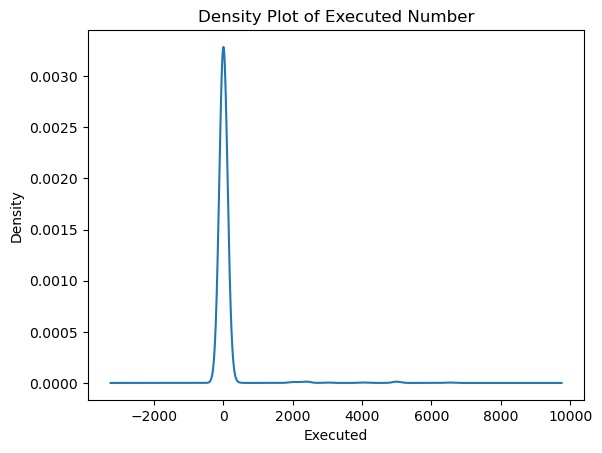

In [13]:
my_df['executed'].plot(kind = 'density')
plt.xlabel('Executed')
plt.title('Density Plot of Executed Number')

Text(0.5, 1.0, 'Density Plot of Fragile Index')

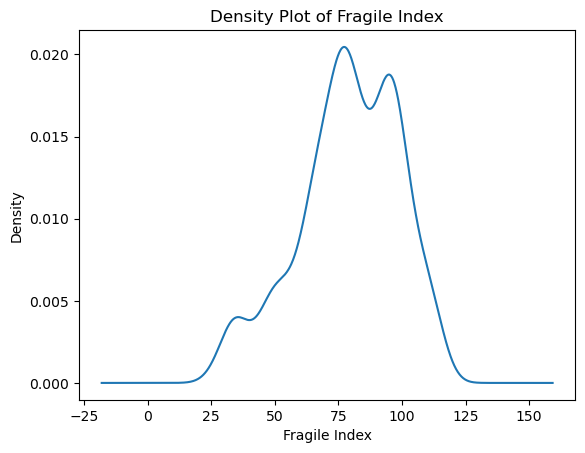

In [14]:
my_df['fragile index'].plot(kind = 'density')
plt.xlabel('Fragile Index')
plt.title('Density Plot of Fragile Index')

Text(0.5, 1.0, 'Density Plot of Democracy Index')

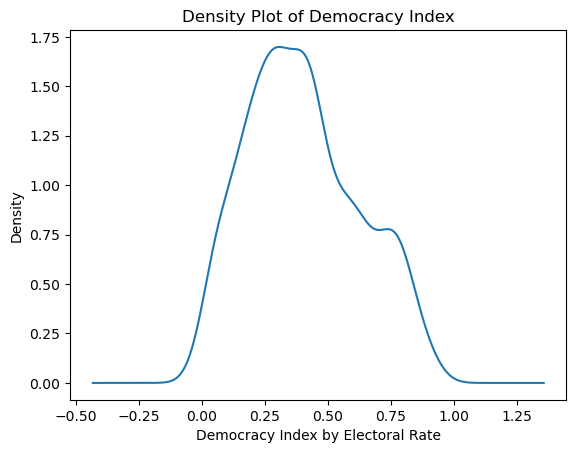

In [15]:
my_df['electoral democracy'].plot(kind = 'density')
plt.xlabel('Democracy Index by Electoral Rate')
plt.title('Density Plot of Democracy Index')

Text(0.5, 1.0, 'Density Plot of Literacy Rate')

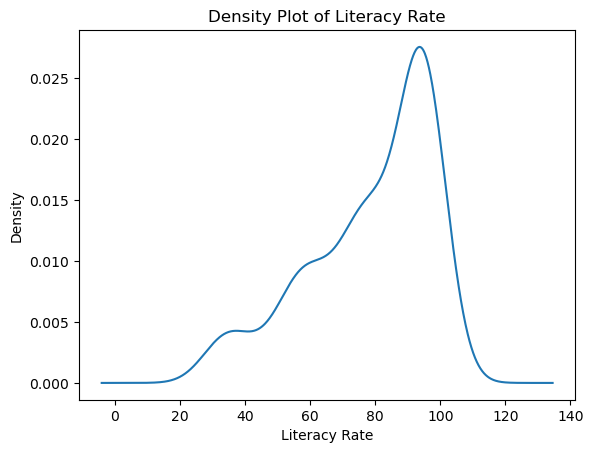

In [50]:
my_df['literacy rate'].plot(kind = 'density')
plt.xlabel('Literacy Rate')
plt.title('Density Plot of Literacy Rate')

In [27]:
executed = my_df.query('executed < 1000')['executed'].unique()

In [29]:
print('Mean: ', np.mean(executed), '\n',
     'Median: ', np.median(executed), '\n',
     'Min: ', np.min(executed), '\n')

Mean:  60.57377049180328 
 Median:  37.0 
 Min:  0 



In [30]:
# outliers more than 1000
my_df = my_df.query('executed < 1000')

In [44]:
# categorize
def categorize(X):
    ar = []
    
    for value in X:
        if value == 0:
            ar.append("No Execution")
        elif value <= 37:
            ar.append("Low")
        elif (value > 37) & (value <= 60.57):
            ar.append("Medium")
        else:
            ar.append("High")
    
    return ar

cate_ex = categorize(my_df['executed'])
my_df['execution group'] = cate_ex

C:\Users\Hyewon Kwon\AppData\Local\Temp\ipykernel_3780\1118552153.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['execution group'] = cate_ex


In [53]:
my_df

,country,region,year,population,latest execution,executed,fragile index,electoral democracy,literacy rate,execution group,execution weight
0,Afghanistan,Asia,2007,28396000,2022,15,102.3,0.397,NaN,Low,1
1,Afghanistan,Asia,2008,28396000,2022,17,105.4,0.403,NaN,Low,1
2,Afghanistan,Asia,2009,28396000,2022,0,108.2,0.392,NaN,No Execution,0
3,Afghanistan,Asia,2010,28396000,2022,0,109.3,0.374,NaN,No Execution,0
4,Afghanistan,Asia,2011,28396000,2022,2,107.5,0.378,31.448851,Low,1
...,...,...,...,...,...,...,...,...,...,...,...
826,Zimbabwe,Africa,2017,16500000,2005,0,101.6,0.295,NaN,No Execution,0
827,Zimbabwe,Africa,2018,16500000,2005,0,102.3,0.305,NaN,No Execution,0
828,Zimbabwe,Africa,2019,16500000,2005,0,99.5,0.293,NaN,No Execution,0
829,Zimbabwe,Africa,2020,16500000,2005,0,99.2,0.293,NaN,No Execution,0


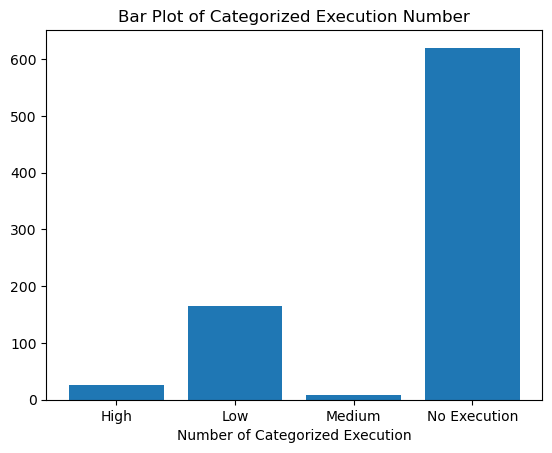

In [48]:
counts = my_df.groupby('execution group').size().reset_index(name = 'count')

plt.bar(counts['execution group'], counts['count'])
plt.xlabel('Number of Categorized Execution')
plt.title('Bar Plot of Categorized Execution Number')
plt.show()

In [51]:
my_df.describe()

,year,population,latest execution,executed,fragile index,electoral democracy,literacy rate
count,819.000000,8.190000e+02,819.000000,819.000000,819.000000,819.000000,204.000000
mean,2013.980464,5.944660e+07,2003.835165,5.782662,79.109524,0.405789,78.584148
std,4.330436,1.682421e+08,17.083097,23.392090,19.830692,0.219433,18.973065
min,2007.000000,2.816980e+05,1954.000000,0.000000,26.300000,0.015000,30.560390
25%,2010.000000,3.520000e+06,1993.000000,0.000000,67.300000,0.241000,66.506342
50%,2014.000000,1.120000e+07,2005.000000,0.000000,79.500000,0.392000,83.441357
75%,2018.000000,3.630000e+07,2019.000000,0.000000,95.300000,0.564500,94.860950
max,2021.000000,1.200000e+09,2022.000000,320.000000,114.900000,0.908000,99.874001


In [52]:
def categoryNum(X):
    ar = []
    
    for value in X:
        if value == "No Execution":
            ar.append(0)
        elif value == "Low":
            ar.append(1)
        elif value == "Medium":
            ar.append(2)
        else:
            ar.append(3)
    
    return ar

ex_val = categoryNum(my_df['execution group'])
my_df['execution weight'] = ex_val

C:\Users\Hyewon Kwon\AppData\Local\Temp\ipykernel_3780\903452023.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['execution weight'] = ex_val


In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(my_df[['fragile index']], my_df[['execution weight']])

print('Intercept: ', model.intercept_, 'Slope: ', model.coef_[0])

Intercept:  [0.43968463] Slope:  [-0.00156044]


In [63]:
import statsmodels.api as sm
X = sm.add_constant(my_df[['fragile index']])
model = sm.OLS(my_df[['execution weight']], X).fit()
pvalues = model.pvalues[1:]
pvalues

fragile index    0.175644
dtype: float64

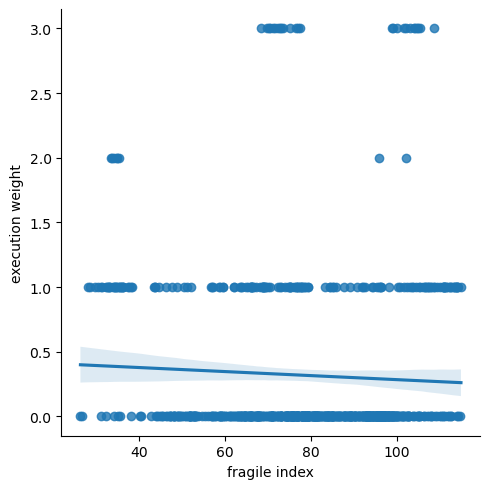

In [64]:
#import seaborn as sns
#sns.lmplot(x = 'fragile index', y = 'execution weight', data = my_df)

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       execution weight   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.837
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.176
Time:                        13:01:03   Log-Likelihood:                -811.99
No. Observations:                 819   AIC:                             1628.
Df Residuals:                     817   BIC:                             1637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4397      0.094      4.683      0.000       0.255       0.624
fragile index    -0.0016      0.001     -1.355      0.176      -0.004       0.001
==============================================================================
Omnibus:                      446.028   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2527.901
Skew:                           2.540   Prob(JB):                         0.00
Kurtosis:                       9.948   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""